# MINI-PROYECTO SUPPORT VECTOR MACHINES 

## Para este proyecto se hizo de la base de datos de [UCI Machine learning repository - default of credit card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
import pandas as pd 
from sklearn.utils import resample # downsample the dataset. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale  # scale and center the data. 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # cross validation. 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.decomposition import PCA # perform pca to plot the data. 


# Lectura de los archivos 

In [7]:
df = pd.read_excel('default of credit card clients.xls', header = 1)

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# La variable que se desea predecir es *default payment next month* al final se termina llamando *DEFAULT*

In [10]:
df.rename({'default payment next month' : 'DEFAULT'}, axis = 'columns', inplace=True)
df.drop('ID', axis= 1 , inplace= True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA (EXPLORATORY DATA ANALYSIS)



In [12]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [13]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [14]:
df.EDUCATION.unique() 

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

### Se tienen valores diferentes a los referidos en la descripción de la base de datos para la columna education 

In [15]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
len(df)

30000

In [17]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [22]:
len(df.loc[(df.EDUCATION == 0) | (df.MARRIAGE == 0)])

68

In [23]:
df_no_missing = df.loc[(df.EDUCATION != 0) & (df.MARRIAGE != 0)]

In [24]:
df_no_missing.shape

(29932, 24)

# DOWNSAMPLE 

In [25]:
df_no_default = df_no_missing[df_no_missing.DEFAULT == 0] # no default 
df_default = df_no_missing[df_no_missing.DEFAULT == 1] # default

In [27]:
df_no_default_downsampled = resample(df_no_default,replace= False, n_samples= 1000 , random_state= 42)
len(df_no_default_downsampled)

1000

In [28]:
df_default_downsampled = resample(df_default,replace= False, n_samples= 1000 , random_state= 42)
len(df_default_downsampled)

1000

In [30]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [31]:
X = df_downsample.drop('DEFAULT',axis= 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [34]:
y = df_downsample.DEFAULT.copy()
y.head()

2000

# ONE HOT ENCODING 

In [35]:
X_encoded = pd.get_dummies(X, columns= ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

# CENTERING AND SCALING THE DATA 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded , y , random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# PRELIMINARY SUPPORT VECTOR MACHINE 

In [40]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

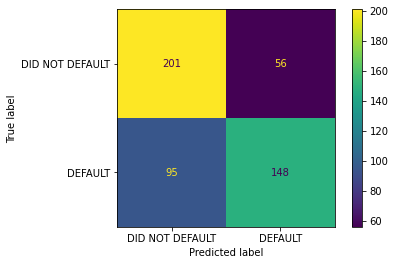

In [41]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test,values_format = 'd',display_labels = ['DID NOT DEFAULT', 'DEFAULT'])

# OPTIMIZATION : GRID SEARCH FINDING THE BEST VALUE FOR *GAMMA* AND THE REGULARIZATION PARAMETER *C*

In [43]:
param_grid = [
    {
        'C' :[ 0.5 , 1 ,10,100],
        'gamma' : ['scale' , 1, 0.1, 0.01, 0.001,  0.0001],
        'kernel' : ['rbf']
    },
]

optimal_params = GridSearchCV( SVC(),
                            param_grid,
                            cv = 5,
                            scoring= 'accuracy',
                            verbose= 0

)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


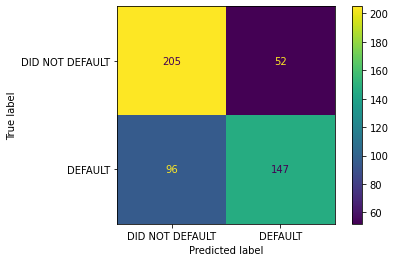

In [44]:
clf_svm = SVC(random_state=42, C = 100, gamma = 0.001 )
clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, X_test_scaled, y_test,values_format = 'd',display_labels = ['DID NOT DEFAULT', 'DEFAULT'])